In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv



### The following project aims to predict the taxi fare based on the model learnt on a dataset which contains past taxi ride records. The data offers us certain attributes of the taxi rides and based on that we wish to train a model in order to predict what the taxi fares could be. This is going to be a Supervised Machine Learning problem and we would be building regression models.

In [ ]:
#Importing the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor


# Reading the Training data into a Pandas Dataframe.

In [ ]:
data=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
print(data.shape)
data.head()

(175000, 17)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [ ]:
from scipy.stats import skew

skewness = data.select_dtypes(exclude= "object").skew()
#skewed_features = skewness[abs(skewness) > 1].index
#skewed_features
skewness

VendorID                  -1.014681
passenger_count            2.874078
trip_distance            302.832744
RatecodeID                14.836471
PULocationID              -0.004293
DOLocationID              -0.000208
extra                      1.093811
tip_amount                 9.432238
tolls_amount               5.124117
improvement_surcharge     -9.787060
total_amount               2.870245
congestion_surcharge      -3.319540
Airport_fee                2.664178
dtype: float64

# Exploring the data

In [ ]:
print(f"Data has following shape: {data.shape}")
print("\nTaxi Data has following features\n",list(data.columns),"\n")
print(data.info())
data.dtypes


Data has following shape: (175000, 17)

Taxi Data has following features
 ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type              object
extra                    float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Airport_fee              float64
dtype: object

### As can be seen from the above output, there are a total of 17 columns, out of which 16 are the feature variables and the column "total_amount" is the Target Variable.

In [ ]:
# Checking which columns are non numerical
print("Non Numerical columns ",data.select_dtypes(exclude="number").columns)

# Descriptive statistics for the numeical features
data.describe().T

Non Numerical columns  Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag',
       'payment_type'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
VendorID,175000.0,0.728377,0.445606,0.000000,0.000000,1.000000,1.000000,2.000000
passenger_count,168923.0,1.357678,0.891283,0.000000,1.000000,1.000000,1.000000,9.000000
trip_distance,175000.0,5.145930,394.971052,0.000000,1.080000,1.840000,3.610000,135182.060000
RatecodeID,168923.0,1.518307,6.514678,1.000000,1.000000,1.000000,1.000000,99.000000
PULocationID,175000.0,132.710349,76.148799,1.000000,67.000000,133.000000,199.000000,264.000000
DOLocationID,175000.0,132.701429,76.192493,1.000000,67.000000,133.000000,199.000000,264.000000
extra,175000.0,1.932143,1.948497,-7.500000,0.000000,1.000000,2.500000,11.750000
tip_amount,175000.0,6.127497,4.610834,0.000079,3.473321,5.286217,7.502746,484.876151
tolls_amount,175000.0,0.646816,2.328274,-29.300000,0.000000,0.000000,0.000000,80.000000
improvement_surcharge,175000.0,0.979689,0.198775,-1.000000,1.000000,1.000000,1.000000,1.000000


### Exploring various features to understand the data better

In [ ]:
# Checking how many rides done by different vendors
print(data["VendorID"].value_counts())
# Different Payment methods used
print("\n",data["payment_type"].value_counts())
#Checking for how many rides data was stored and forwarded
print("\n",data["store_and_fwd_flag"].value_counts())
#Checking no of rides against various RatecodeIDs
print("\n",data["RatecodeID"].value_counts())


VendorID
1    127340
0     47597
2        63
Name: count, dtype: int64

 payment_type
Credit Card    135257
Cash            30141
Wallet           6077
unknown          2333
UPI              1192
Name: count, dtype: int64

 store_and_fwd_flag
N    167729
Y      1194
Name: count, dtype: int64

 RatecodeID
1.0     158652
2.0       7314
5.0       1036
99.0       748
3.0        727
4.0        446
Name: count, dtype: int64


In [ ]:
## Exploring the features which have negative values

print("Number of Negative values in different numerical columns")
print("1: ",data[data.total_amount<0].shape)
print("2: ",data[data.extra<0].shape)
print("3: ",data[data.tolls_amount<0].shape)
print("4: ",data[data.improvement_surcharge<0].shape)
print("5: ",data[data.congestion_surcharge<0].shape)
print("6: ",data[data.Airport_fee<0].shape)

Number of Negative values in different numerical columns
1:  (1725, 17)
2:  (1105, 17)
3:  (126, 17)
4:  (1725, 17)
5:  (1386, 17)
6:  (259, 17)


### Non random nature of negative values.

In [ ]:
## from the output above we can see that the maximum number of values that are negative are 1725 which is for total_amount and
## improvement_surcharge, let'see if the index of these 2 columns are same for the negative values.
print(data[data.total_amount<0].index.equals(data[data.improvement_surcharge<0].index))

True


In [ ]:
## See True above implies Indices match a 100% implies these negative values aren't random or by error but are systematic

## Some observations
### 1) From above outputs, we can see that, out of 17 features, 4 features are non numeric type namely ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 'payment_type']
### 2) We can see that VendorID column despite being numeric is in fact a categorical column with 0,1,2 being the labels for the 3 different vendors (We shall OHE it later).
### 3) Similarly the RatecodeID column despite being numerical seems to be some kind of ID for the rides and there are 6 different unique IDs (1,2,3,4,5,99)
### 4) Similarly payment_type has 4 categories Credit Card, UPI, Cash and Wallet and there are some missing values.
### 5) Most of the rides weren't stored and forwarded.
### 6)There are some negative values in the amount related columns like tip_amount,	tolls_amount,	improvement_surcharge,	total_amount	 and these are systematically negative as we checked indices above (cf above) hence we won't drop these negative values.

# Feature engineering
###  Converting the pickup date_time and dropoff date_time into Pandas timestamp variable and then creating a new feature to store the total ride duration in minutes.

In [ ]:
data["tpep_pickup_datetime"]=pd.to_datetime(data["tpep_pickup_datetime"])
print(type(data["tpep_pickup_datetime"][0]))
data["tpep_dropoff_datetime"]=pd.to_datetime(data["tpep_dropoff_datetime"])

#Creating a new feature ride duration in minutes
data["ride_duration"]=(data["tpep_dropoff_datetime"]-data["tpep_pickup_datetime"]).dt.total_seconds()/60
print(data["ride_duration"].describe())

#Sanity check for ride duration variable
data[(data["ride_duration"]<=0)]


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
count    175000.000000
mean         17.893002
std          62.263379
min        -118.900000
25%         -19.516667
50%          16.466667
75%          53.166667
max        1537.150000
Name: ride_duration, dtype: float64


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,ride_duration
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,-45.600000
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,-63.433333
5,0,2023-06-29 16:31:14,2023-06-29 16:29:06,1.0,0.00,99.0,N,225,256,Credit Card,0.0,1.507831,0.0,1.0,44.70,0.0,0.0,-2.133333
6,1,2023-06-30 12:54:57,2023-06-30 11:52:20,1.0,1.33,1.0,N,214,240,Cash,0.0,0.094334,0.0,1.0,18.20,2.5,0.0,-62.616667
9,1,2023-06-29 11:12:12,2023-06-29 09:39:24,1.0,2.50,1.0,N,138,196,Credit Card,0.0,6.091603,0.0,1.0,23.10,2.5,0.0,-92.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174983,1,2023-06-30 21:57:30,2023-06-30 20:55:40,NaN,4.22,NaN,NaN,193,108,Wallet,0.0,9.141031,0.0,1.0,34.19,NaN,NaN,-61.833333
174992,1,2023-06-29 00:15:57,2023-06-28 23:54:25,2.0,0.37,1.0,N,219,67,Cash,-1.0,1.855890,0.0,-1.0,-10.10,-2.5,0.0,-21.533333
174994,0,2023-06-29 14:08:39,2023-06-29 13:42:20,1.0,1.90,1.0,N,95,95,Credit Card,2.5,5.928588,0.0,1.0,20.15,2.5,0.0,-26.316667
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.0,-28.583333


### As can be seen in above output, a good number (65693) ride records have ride duration as negative, inspecting that it seems that pickup and dropoff time are interchanged therefore we replace these negative ride duration values by absolute values.


In [ ]:
data["ride_duration"]=data["ride_duration"].abs()
print("Post making ride_duration absolute",data.ride_duration.describe())
data.head()

Post making ride_duration absolute count    175000.000000
mean         44.570096
std          47.014730
min           0.000000
25%          17.800000
50%          37.933333
75%          64.250000
max        1537.150000
Name: ride_duration, dtype: float64


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,ride_duration
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,45.600000
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,63.433333
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,53.650000
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,56.866667
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,18.833333


#### Dropping the pickup and drop off datetime features.

In [ ]:
#Dropping the date_time columns since they are of no use, dates are also in a close range of 4 days so they don't provide any useful information.
data.drop(["tpep_pickup_datetime","tpep_dropoff_datetime"],axis=1,inplace=True)
data.shape


(175000, 16)

In [ ]:
#Sorting the order of features for convenience
data=pd.DataFrame(data,columns=['VendorID', 'passenger_count', 'trip_distance', 'ride_duration', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge','congestion_surcharge', 'Airport_fee',
       'total_amount' ])
print(data.shape)
data.head()


(175000, 16)


,VendorID,passenger_count,trip_distance,ride_duration,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,total_amount
0,1,1.0,2.14,45.600000,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,2.5,0.0,20.64
1,0,1.0,2.70,63.433333,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,2.5,0.0,25.55
2,1,1.0,1.15,53.650000,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,2.5,0.0,17.64
3,0,1.0,0.40,56.866667,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,2.5,0.0,12.80
4,1,3.0,1.10,18.833333,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,2.5,0.0,18.00


### Dropping the PU Location ID and DO location ID features

In [ ]:
data.drop(["PULocationID","DOLocationID"],axis=1,inplace =True)
data.shape

(175000, 14)

# Extreme Values Treatment
#### From the descriptive statistics that we found out for numerical columns we could see that there are some features which have extremely skewed distribution as their max values are way off from the 3rd quantile Q3.


In [ ]:
print(data[(data.trip_distance>=100)].shape)

#Replacing the extreme values of trip_distance with 100
data["trip_distance"][data[(data.trip_distance>=100)].index]=100

(7, 14)


/tmp/ipykernel_20/3869183405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["trip_distance"][data[(data.trip_distance>=100)].index]=100


In [ ]:
print(data[data.ride_duration>=600].shape)
#replacing ride_duration with duration more than 10 hours with 10 hours
data["ride_duration"][data[data.ride_duration>=600].index]=600

(116, 14)


/tmp/ipykernel_20/3203389267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ride_duration"][data[data.ride_duration>=600].index]=600


In [ ]:
# Treating extreme values of tip_amount
print("No of values which are outliers",data[data.tip_amount>=100].shape)

data["tip_amount"][data[data.tip_amount>=100].index]=100
data[data.tip_amount>100] #Sanity Check

No of values which are outliers (7, 14)


/tmp/ipykernel_20/3294450778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tip_amount"][data[data.tip_amount>=100].index]=100


,VendorID,passenger_count,trip_distance,ride_duration,RatecodeID,store_and_fwd_flag,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,total_amount


In [ ]:
# Treating outliers of total_amount
'''print("No of values which are right side outliers",data[data.total_amount>=210].shape)
print("No of values which are right side outliers",data[data.total_amount>=210].shape)
print("99.9 percentile value",data.total_amount.quantile(0.999))

#Replacing outliers with 99.9 percentile value (Winsonizing as earlier)
data["total_amount"][data[data.total_amount>=207.45].index]=207.45
data[data.total_amount>207.5] #Sanity Check'''


'print("No of values which are right side outliers",data[data.total_amount>=210].shape)\nprint("No of values which are right side outliers",data[data.total_amount>=210].shape)\nprint("99.9 percentile value",data.total_amount.quantile(0.999))\n\n#Replacing outliers with 99.9 percentile value (Winsonizing as earlier)\ndata["total_amount"][data[data.total_amount>=207.45].index]=207.45\ndata[data.total_amount>207.5] #Sanity Check'

In [ ]:
## treating left side outliers of total_amount
'''print("0.05 percentile value",data.total_amount.quantile(0.0005))
print("No of values which are right side outliers",data[data.total_amount<=-90].shape)
data["total_amount"][data[data.total_amount<=-90].index]=-90
data[data.total_amount<-91] # Sanity check
'''

'print("0.05 percentile value",data.total_amount.quantile(0.0005))\nprint("No of values which are right side outliers",data[data.total_amount<=-90].shape)\ndata["total_amount"][data[data.total_amount<=-90].index]=-90\ndata[data.total_amount<-91] # Sanity check\n'

## Converting VendorID and RatecodeID to object type based on our previous insight on its nature being categorical

In [ ]:
data["VendorID"]=data["VendorID"].astype("object")
data["RatecodeID"]=data["RatecodeID"].astype("object")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  object 
 1   passenger_count        168923 non-null  float64
 2   trip_distance          175000 non-null  float64
 3   ride_duration          175000 non-null  float64
 4   RatecodeID             168923 non-null  object 
 5   store_and_fwd_flag     168923 non-null  object 
 6   payment_type           175000 non-null  object 
 7   extra                  175000 non-null  float64
 8   tip_amount             175000 non-null  float64
 9   tolls_amount           175000 non-null  float64
 10  improvement_surcharge  175000 non-null  float64
 11  congestion_surcharge   168923 non-null  float64
 12  Airport_fee            168923 non-null  float64
 13  total_amount           175000 non-null  float64
dtypes: float64(10), object(4)
memory usa

# Train and Validation split
#### Before we start preprocessing, Splitting the train dataset into train set and validation set with validation set size being 20% and also creating a copy of train data to do visualisations.

In [ ]:
#Splitting data into training and validation set
from sklearn.model_selection import train_test_split
train,val=train_test_split(data,test_size=0.2,random_state=42)
print("Training set shape :",train.shape)
print("Test set shape :",val.shape)

# Creating a copy of train data for visualisation purpose
visual= train.copy()

#Separating features and labels for both Training and Validation set
X_train=train.drop(["total_amount"],axis=1)
X_val=val.drop(["total_amount"],axis=1)
y_train=train["total_amount"]
y_val=val["total_amount"]

Training set shape : (140000, 14)
Test set shape : (35000, 14)


# Visualisations

In [ ]:
# Descriptive Statistics for the numerical variables
visual.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,135159.0,1.359051,0.892499,0.000000,1.000000,1.000000,1.000000,9.00
trip_distance,140000.0,3.682218,4.900898,0.000000,1.080000,1.840000,3.620000,100.00
ride_duration,140000.0,44.066808,34.900679,0.000000,17.783333,38.000000,64.216667,600.00
extra,140000.0,1.936735,1.951443,-7.500000,0.000000,1.000000,2.500000,11.75
tip_amount,140000.0,6.122978,4.432294,0.000079,3.472274,5.288747,7.508931,100.00
tolls_amount,140000.0,0.650111,2.328823,-29.300000,0.000000,0.000000,0.000000,80.00
improvement_surcharge,140000.0,0.979723,0.198490,-1.000000,1.000000,1.000000,1.000000,1.00
congestion_surcharge,135159.0,2.248259,0.817195,-2.500000,2.500000,2.500000,2.500000,2.50
Airport_fee,135159.0,0.159360,0.512795,-1.750000,0.000000,0.000000,0.000000,1.75
total_amount,140000.0,29.665179,25.403876,-576.750000,16.300000,21.450000,31.900000,587.25


### Several Insights
#### 1)VendorID column is in fact a categorical column with 0,1,2 denoting the 3 different vendors.
#### 2)RatecodeID also seems to be some sort of categorical column with categories (1,2,3,4,5,99)

Text(0.5, 0, 'Total Amount')

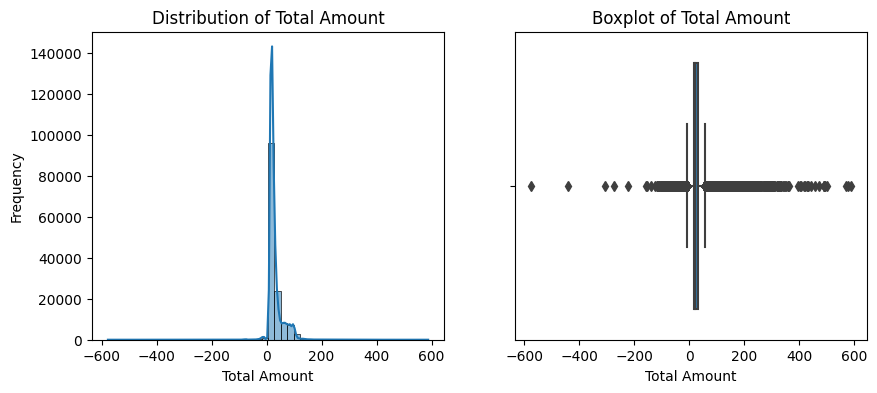

In [ ]:
#Plotting histogram for the target variable total_amount
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(visual['total_amount'], bins=50, kde=True)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')

#Plotting a boxplot for target variable
plt.subplot(1,2,2)
sns.boxplot(x=visual['total_amount'])
plt.title('Boxplot of Total Amount')
plt.xlabel('Total Amount')

In [ ]:
# Counting the number of samples that are outliers on the basis of the target variable
Q1=visual["total_amount"].quantile(0.25)
Q3=visual["total_amount"].quantile(0.75)
IQR=Q3-Q1
visual[(visual["total_amount"]<Q1-1.5*IQR)|(visual["total_amount"]>Q3+1.5*IQR)].shape

(18709, 14)

### So the target variable has a positively skewed distribution with many outliers as shown on the Boxplot and further counted using the IQR range method.

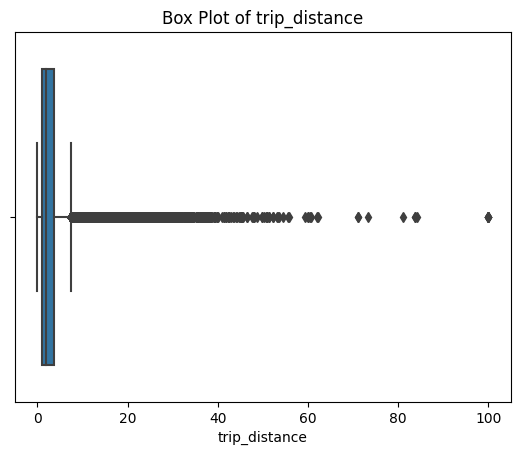

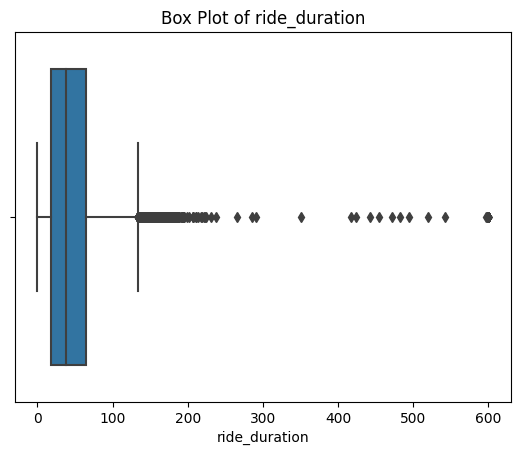

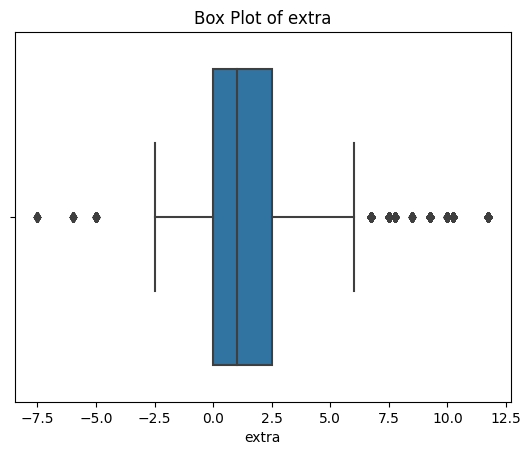

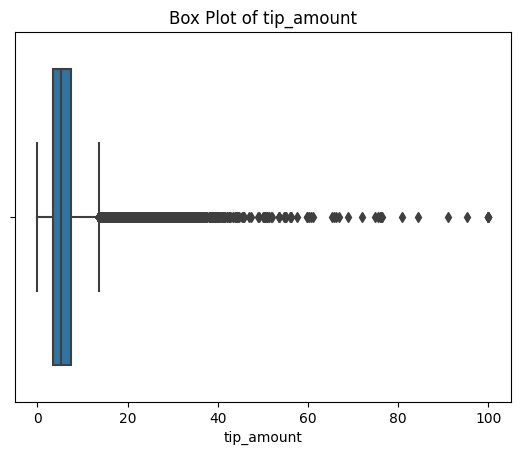

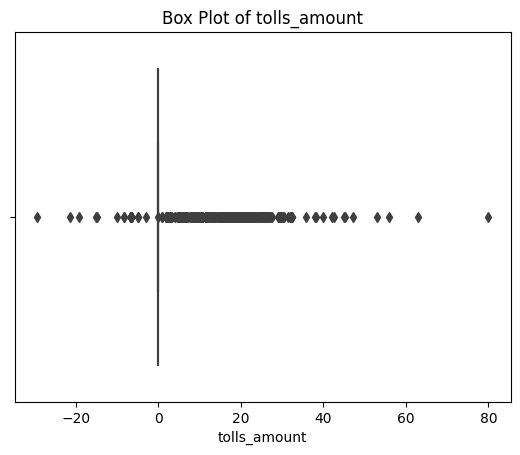

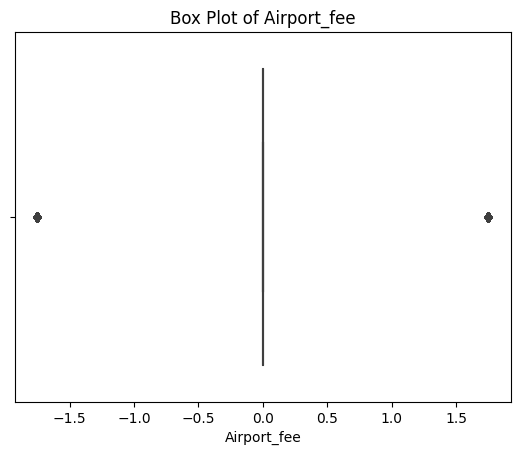

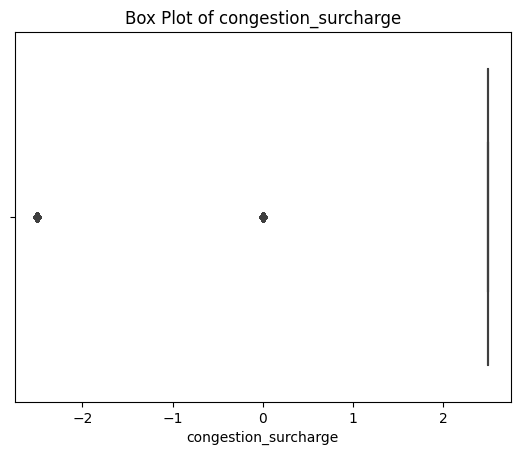

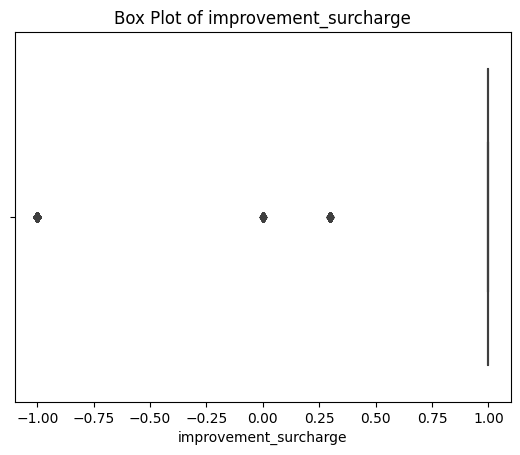

In [ ]:
# Plotting boxplots for various numerical features
numerical_features = ['trip_distance','ride_duration', 'extra', 'tip_amount', 'tolls_amount',"Airport_fee","congestion_surcharge","improvement_surcharge"]
for feature in numerical_features:
    sns.boxplot(x=visual[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


### As evident from the above boxplot, all the numerical features have skewed distribution and almost all of them have outliers.
### Further, Airport fee has just 3 values -1.75,0.,1.75 seems like some sort of percentage on base fare.            Congestion surcharges has just 3 values (-2.75,0,2.75), improvement_surcharge has just 4 values (-1,0,0.3,1)



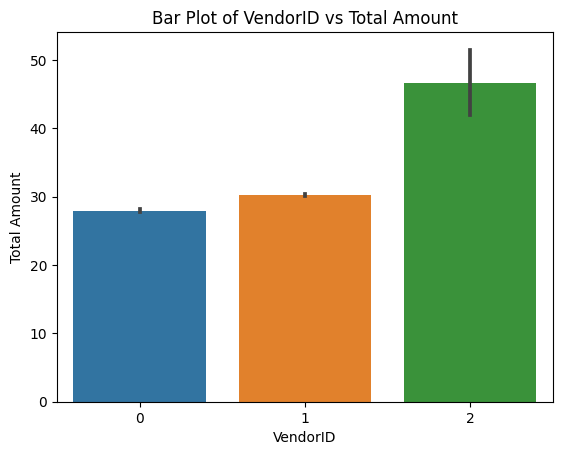

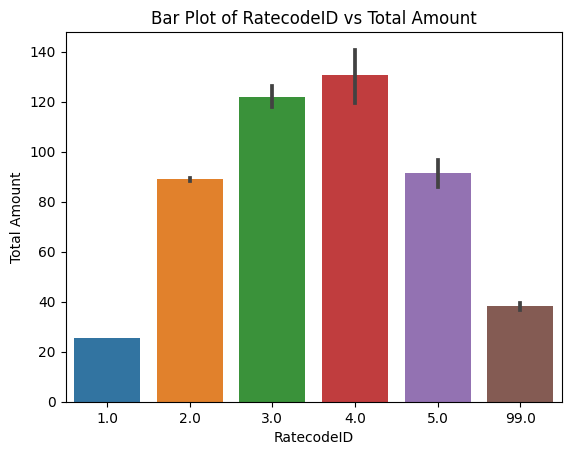

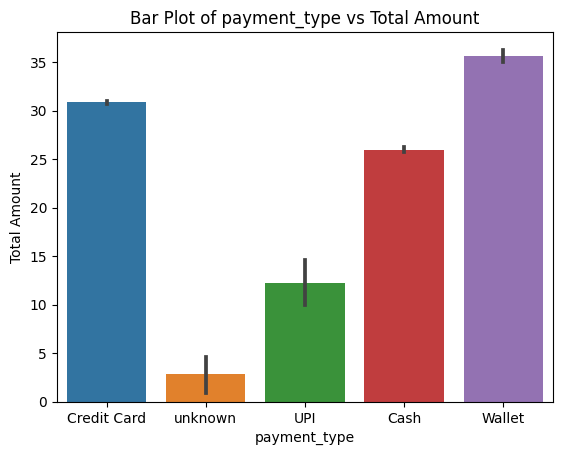

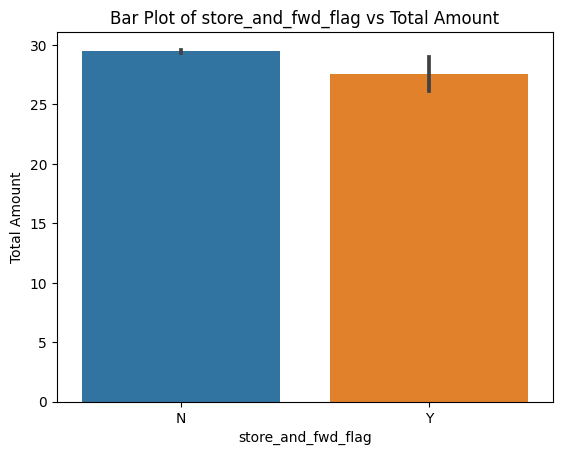

In [ ]:
# Plotting barplot to show the mean value of total amount against the various categories of the 2 categorical variables VendorID and RateCodeID
categorical_features = ['VendorID', 'RatecodeID',"payment_type","store_and_fwd_flag"]
for feature in categorical_features:
    sns.barplot(x=feature, y='total_amount', data=visual)
    plt.title(f'Bar Plot of {feature} vs Total Amount')
    plt.xlabel(feature)
    plt.ylabel('Total Amount')
    plt.show()

#### 1)As can be seen the average fare is different for different RateCodeIDs and since there is no monotonous increase in ride fare with ratecode so we may conclude that it isn't an ordinal variable after all.
#### 2) And, for the rides done by vendor 2 the average fare seems to be the highest despite the fraction of ride done by him being the lowest as confirmed from the below barplot.
#### 3) It seems that the rides for which payment were made by Wallet were on an average costlier vis a vis other payment menthods.
#### 4) Also the rides which weren't stored and forwarded were costlier on an average.

<Axes: xlabel='VendorID', ylabel='count'>

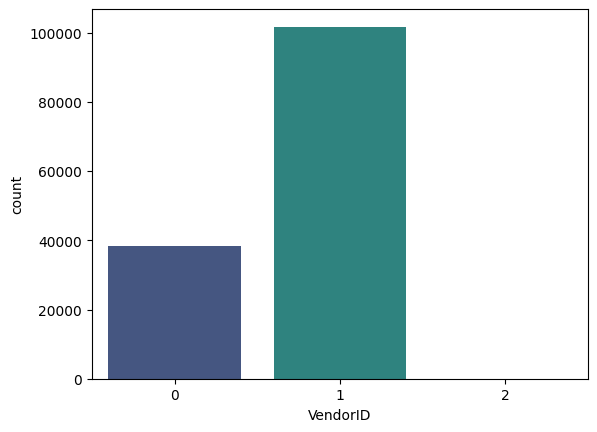

In [ ]:
sns.countplot(x='VendorID', data=visual, palette='viridis')

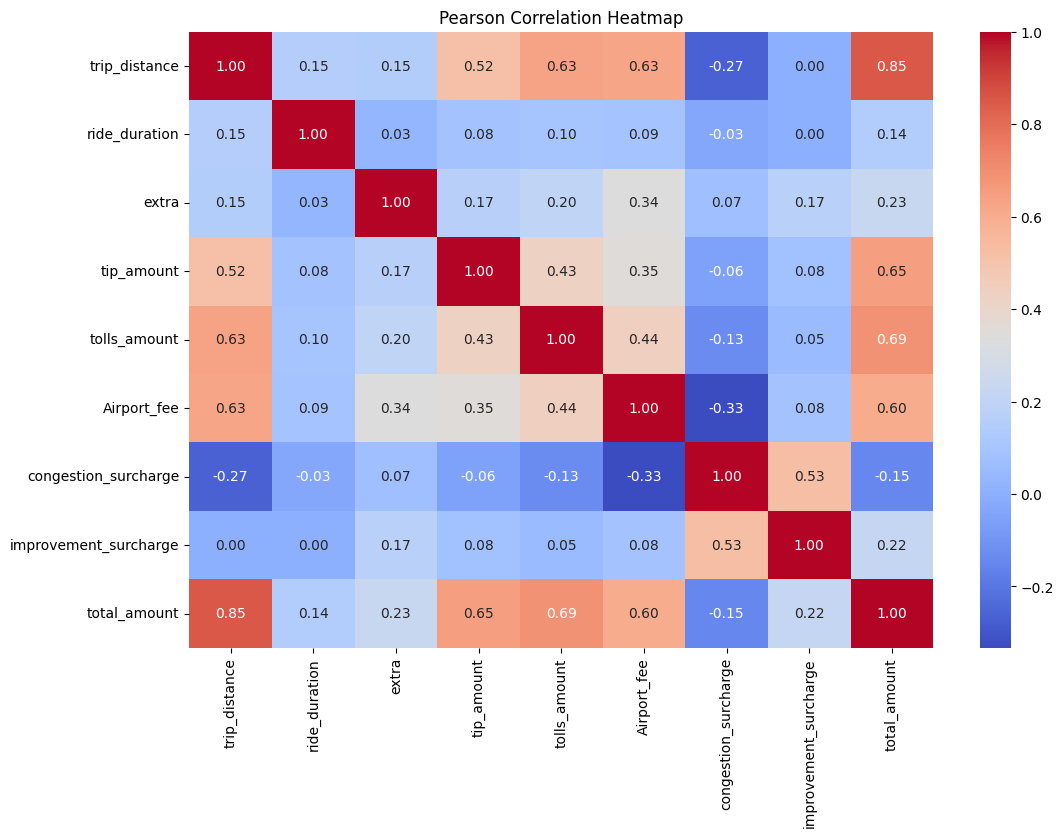

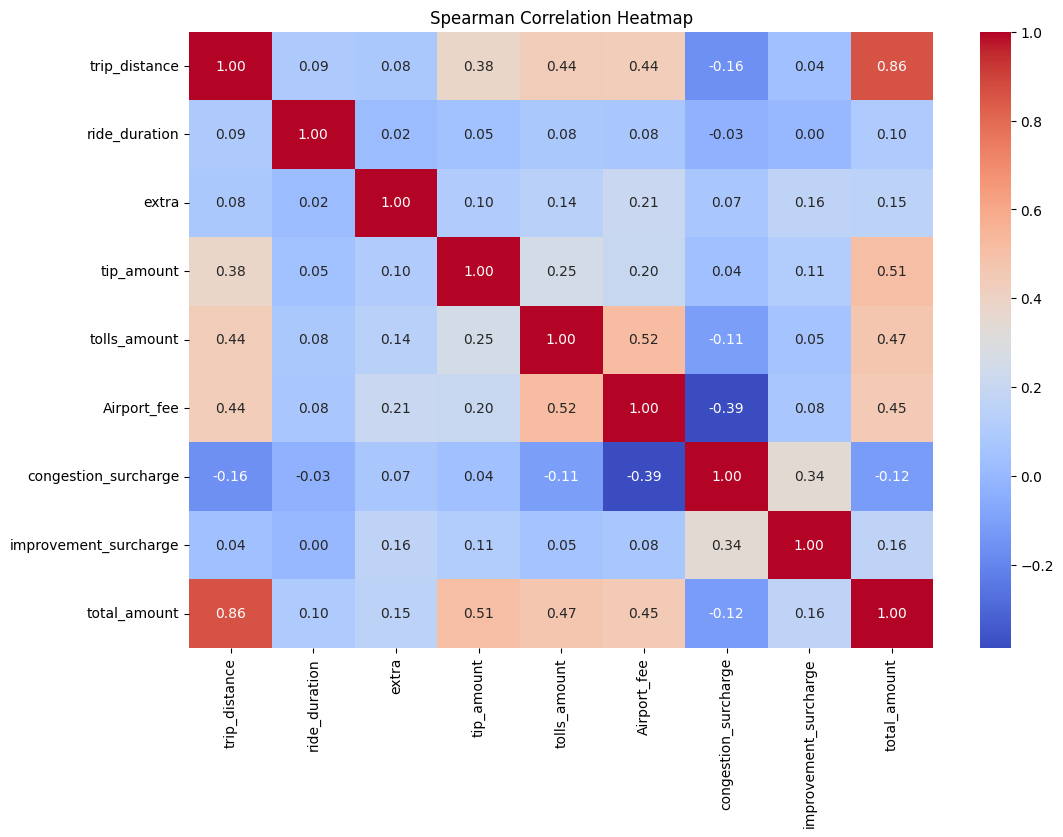

In [ ]:
# FInding correlation betwen numerical features and total_amount using Pearson and Spearman correlation coeffcient

correlation_matrix_pearson = visual[numerical_features + ['total_amount']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f",)
plt.title('Pearson Correlation Heatmap')
plt.show()
#Plotting Spearman heatmap
correlation_matrix_spearman =  visual[numerical_features + ['total_amount']].corr(method="spearman")
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()

### From the above correlation heatmaps we can infer the following about the data.
#### 1) Target_variable is highly positively correlated with trip_distance, tip_amount, tolls_amount,Airport_fee and mildly positively with improvement_surcharge and extra.
#### 2) target variable is negatively correlated with congestion surcharge.
#### 3) feature trip_distance is correlated with certain other features viz. tip, toll amounts and Airport fee and these 3 are correlated with each other.(Might come useful when we will want to reduce features)
#### 4) Differences in Spearman and Pearson correlations is indicative of the fact that the features are also non linearly related with the Target variable.

# Preprocessing

In [ ]:
# Separating numerical and categorical features
num_features=X_train.select_dtypes(include=["int","float"]).columns
cat_features=X_train.select_dtypes(include=["object"]).columns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer



## Making separate pipelines for categorical and numerical features.

In [ ]:
## Making separate pipeline for categorical and numerical features preprocessing
#Importing necessary items
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Creating pipelines
cat_pipeline = Pipeline(steps=[("Cat_Impute",SimpleImputer(strategy="most_frequent")),("OHE",OneHotEncoder(sparse_output=False))])
num_pipeline = Pipeline(steps=[("num_impute",SimpleImputer(strategy="median")),("Scaling",MinMaxScaler())])

#Combining the transformations
CT=ColumnTransformer([("categorical",cat_pipeline,cat_features),("numerical",num_pipeline,num_features)],remainder="passthrough")
X_train_transformed=CT.fit_transform(X_train)
print("Feature matrix's Shape post transformation",X_train_transformed.shape)
print("\nName of the transformed features\n",CT.get_feature_names_out())


Feature matrix's Shape post transformation (140000, 25)

Name of the transformed features
 ['categorical__VendorID_0' 'categorical__VendorID_1'
 'categorical__VendorID_2' 'categorical__RatecodeID_1.0'
 'categorical__RatecodeID_2.0' 'categorical__RatecodeID_3.0'
 'categorical__RatecodeID_4.0' 'categorical__RatecodeID_5.0'
 'categorical__RatecodeID_99.0' 'categorical__store_and_fwd_flag_N'
 'categorical__store_and_fwd_flag_Y' 'categorical__payment_type_Cash'
 'categorical__payment_type_Credit Card' 'categorical__payment_type_UPI'
 'categorical__payment_type_Wallet' 'categorical__payment_type_unknown'
 'numerical__passenger_count' 'numerical__trip_distance'
 'numerical__ride_duration' 'numerical__extra' 'numerical__tip_amount'
 'numerical__tolls_amount' 'numerical__improvement_surcharge'
 'numerical__congestion_surcharge' 'numerical__Airport_fee']


In [ ]:
##Transforming the validation feature matrix as well
X_val_transformed=CT.transform(X_val)

# Baseline SGD with l2 penalty.

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(max_iter=1000,average=13,penalty="l2",random_state=42)
sgd.fit(X_train_transformed,y_train)

SGDRegressor(average=13, random_state=42)

In [ ]:
#Regression metrics
print("Score on train data :",sgd.score(X_train_transformed,y_train))
print("MSE TRAINING :",mean_squared_error(y_train,sgd.predict(X_train_transformed)))
print("Score on validation data :",sgd.score(X_val_transformed,y_val))
print("MSE Validation :",mean_squared_error(y_val,sgd.predict(X_val_transformed)))

Score on train data : 0.8663465603225666
MSE TRAINING : 86.25355868514755
Score on validation data : 0.8849419598778051
MSE Validation : 74.87495745964411


# TEST DATA IMPORTED AND FEATURE ENGINEERING AND PREPROCESSING BEING DONE ON IT

In [ ]:
test=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")
print(test.shape)
test.drop(["PULocationID","DOLocationID"],axis=1,inplace=True)


(50000, 16)


In [ ]:
## Ride duration feature creation
test["tpep_pickup_datetime"]=pd.to_datetime(test["tpep_pickup_datetime"])
print(type(test["tpep_pickup_datetime"][0]))
test["tpep_dropoff_datetime"]=pd.to_datetime(test["tpep_dropoff_datetime"])
#Creating a new feature ride duration in minutes
test["ride_duration"]=(test["tpep_dropoff_datetime"]-test["tpep_pickup_datetime"]).dt.total_seconds()/60
print(test["ride_duration"].describe())
#Sanity check for ride duration variable
test[(test["ride_duration"]<=0)]
test["ride_duration"]=test["ride_duration"].abs()
# Post making ride duration absolute
test["ride_duration"].describe()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
count    50000.000000
mean        18.034757
std         64.505173
min       -117.316667
25%        -19.300000
50%         16.766667
75%         53.183333
max       4682.866667
Name: ride_duration, dtype: float64


count    50000.000000
mean        44.616875
std         49.954689
min          0.000000
25%         17.866667
50%         37.716667
75%         64.300000
max       4682.866667
Name: ride_duration, dtype: float64

In [ ]:
### Exploring the categorical columns of test data.

In [ ]:
# Checking how many rides done by different vendors
print(test["VendorID"].value_counts())
# Different Payment methods used
print("\n",test["payment_type"].value_counts())
#Checking for how many rides data was stored and forwarded
print("\n",test["store_and_fwd_flag"].value_counts())
#Checking no of rides against various RatecodeIDs
print("\n",test["RatecodeID"].value_counts())


VendorID
1    36480
0    13503
2       17
Name: count, dtype: int64

 payment_type
Credit Card    38672
Cash            8571
Wallet          1779
unknown          665
UPI              313
Name: count, dtype: int64

 store_and_fwd_flag
N    47881
Y      340
Name: count, dtype: int64

 RatecodeID
1.0     45373
2.0      1956
5.0       314
99.0      238
3.0       216
4.0       123
6.0         1
Name: count, dtype: int64


### All the categorical columns have same labels as training data but RatecodeID has one sample which takes label 6 which we will replace with label 1(most frequent)

In [ ]:
test["RatecodeID"][test[test.RatecodeID==6.0].index]=1.0
#Sanity check
test["RatecodeID"].value_counts()

/tmp/ipykernel_20/703020214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["RatecodeID"][test[test.RatecodeID==6.0].index]=1.0


RatecodeID
1.0     45374
2.0      1956
5.0       314
99.0      238
3.0       216
4.0       123
Name: count, dtype: int64

In [ ]:
# Dropping PU and DO time from Test data
test.drop(["tpep_dropoff_datetime","tpep_pickup_datetime"],axis=1,inplace=True)
# Converting VendorID and RatecodeID to object type
test["VendorID"]=test["VendorID"].astype("object")
test["RatecodeID"]=test["RatecodeID"].astype("object")

In [ ]:
print(test.shape)

#Arranging the features as we did for train_data
test=pd.DataFrame(test,columns=['VendorID', 'passenger_count', 'trip_distance', 'ride_duration', 'RatecodeID',
       'store_and_fwd_flag', 'payment_type','extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge','congestion_surcharge', 'Airport_fee' ])

#Sanity Check if the order is correct or not
X_train.columns.equals(test.columns)


(50000, 13)


True

## SImilar Extreme value treatment on Test Data


In [ ]:
#Replacing the outlier values of trip_distance with 99.9 percentile value that is 35
test["trip_distance"][test[(test.trip_distance>=100)].index]=100

#Same treatment as we did for trip_distance
test["ride_duration"][test[test.ride_duration>=600].index]=600

'''# Replacing the Ratecode greater than 5 which was 99 by the most frequent rating which was 1
test["RatecodeID"][test[test.RatecodeID>5].index]=5
data.RatecodeID.value_counts()'''

# Treating outlier of tolls_amount
'''print("No of values which are outliers",test[test.tolls_amount>=22].shape)
test.tolls_amount.quantile(0.999)
#Replacing outliers with 99.9 percentile value (Winsonizing as earlier)
test["tolls_amount"][test[test.tolls_amount>=21.55].index]=21.55
test[test.tolls_amount>21.6] #Sanity Check'''

# Treating outlier of tip_amount
print("No of values which are outliers",test[test.tip_amount>=100].shape)
test["tip_amount"][test[test.tip_amount>=100].index]=100
test[test.tip_amount>100] #Sanity Check

No of values which are outliers (0, 13)


/tmp/ipykernel_20/3390002133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["trip_distance"][test[(test.trip_distance>=100)].index]=100
/tmp/ipykernel_20/3390002133.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["ride_duration"][test[test.ride_duration>=600].index]=600
/tmp/ipykernel_20/3390002133.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["tip_amount"][test[test.tip_amount>=100].index]=100


,VendorID,passenger_count,trip_distance,ride_duration,RatecodeID,store_and_fwd_flag,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee


# MODEL 1 RIDGE REGRESSION WITH ALPHAS CV (HPT)

In [ ]:
## Trying RIDGE REGRESSION WITH ALPHAS CROSS VALIDATED USING GRID METHOD

from sklearn.linear_model import RidgeCV
RCV = RidgeCV(alphas=[0.1,0.01,0.001,1,5,10],cv=5)
RCV.fit(X_train_transformed,y_train)


RidgeCV(alphas=[0.1, 0.01, 0.001, 1, 5, 10], cv=5)

In [ ]:
print("Best alpha",RCV.alpha_)  #gives best alpha

# regression Metrics
print("Score on train data :",RCV.score(X_train_transformed,y_train))
print("MSE TRAINING :",mean_squared_error(y_train,RCV.predict(X_train_transformed)))
print("Score on validation data :",RCV.score(X_val_transformed,y_val))
print("MSE Validation :",mean_squared_error(y_val,RCV.predict(X_val_transformed)))

Best alpha 0.1
Score on train data : 0.8723492277782805
MSE TRAINING : 82.37972325742933
Score on validation data : 0.8936779787078988
MSE Validation : 69.18992199775688


### INSIGHT : The model performs decently but is surely an underfit as reflected by high MSE and low R2 score on train data. So,We need to move towards other models to understand the underlying pattern of the data in a better manner.

In [ ]:
'''# RIDGE REGRESSION WITH RANDOMIZED SEARCH CV GAVE ALPHA = 0.37

from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.linear_model import Ridge
from scipy.stats import loguniform

# Assuming you have your features (X) and target variable (y) ready

# Create a Ridge regression model
ridge = Ridge()

# Define the hyperparameter grid
param_dist = {'alpha': loguniform(0.001, 100)}
random_search = RandomizedSearchCV(ridge, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)


# Fit the RandomizedSearchCV on your data
random_search.fit(X_train_transformed,y_train)

# Print the best hyperparameters
print("Best alpha:", random_search.best_params_['alpha'])
print("Score on Train data",random_search.score(X_train_transformed,y_train))
print("Score on Test data",random_search.score(CT.transform(X_val),y_val))'''



'# RIDGE REGRESSION WITH RANDOMIZED SEARCH CV GAVE ALPHA = 0.37\n\nfrom sklearn.model_selection import RandomizedSearchCV, KFold\nfrom sklearn.linear_model import Ridge\nfrom scipy.stats import loguniform\n\n# Assuming you have your features (X) and target variable (y) ready\n\n# Create a Ridge regression model\nridge = Ridge()\n\n# Define the hyperparameter grid\nparam_dist = {\'alpha\': loguniform(0.001, 100)}\nrandom_search = RandomizedSearchCV(ridge, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)\n\n\n# Fit the RandomizedSearchCV on your data\nrandom_search.fit(X_train_transformed,y_train)\n\n# Print the best hyperparameters\nprint("Best alpha:", random_search.best_params_[\'alpha\'])\nprint("Score on Train data",random_search.score(X_train_transformed,y_train))\nprint("Score on Test data",random_search.score(CT.transform(X_val),y_val))'

# MOdel 2 LASSO with CV to decide alpha.

In [ ]:
from sklearn.linear_model import LassoCV
lscv = LassoCV()
lscv.fit(X_train_transformed,y_train)

LassoCV()

In [ ]:
#Regression Metrics
print("Best alpha :",lscv.alpha_)
print("Score on train data :",lscv.score(X_train_transformed,y_train))
print("MSE TRAINING :",mean_squared_error(y_train,lscv.predict(X_train_transformed)))
print("Score on validation data :",lscv.score(X_val_transformed,y_val))
print("MSE Validation :",mean_squared_error(y_val,lscv.predict(X_val_transformed)))


Best alpha : 0.003533918366081649
Score on train data : 0.8722075726288688
MSE TRAINING : 82.47114073813411
Score on validation data : 0.8935688788278732
MSE Validation : 69.2609196339681


### INSIGHT : Again no significant improvement vis a vis Model 1.

# Model 3 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
slrm = LinearRegression()
slrm.fit(X_train_transformed,y_train)


LinearRegression()

In [ ]:
print("Score on train data :",slrm.score(X_train_transformed,y_train))
print("MSE TRAINING :",mean_squared_error(y_train,slrm.predict(X_train_transformed)))
print("Score on validation data :",slrm.score(X_val_transformed,y_val))
print("MSE Validation :",mean_squared_error(y_val,slrm.predict(X_val_transformed)))

Score on train data : 0.8723481867188123
MSE TRAINING : 82.38039510758266
Score on validation data : 0.8936873267950914
MSE Validation : 69.18383865381905


### Slightly better than Model 1 and Model 2.

# Model 4 DTR

In [ ]:
# DECISION TREE REGRESSOR
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train_transformed,y_train)


DecisionTreeRegressor()

In [ ]:
print("Score on train data :",DTR.score(X_train_transformed,y_train))
print("MSE TRAINING :",mean_squared_error(y_train,DTR.predict(X_train_transformed)))
print("Score on validation data :",DTR.score(X_val_transformed,y_val))
print("MSE Validation :",mean_squared_error(y_val,DTR.predict(X_val_transformed)))

Score on train data : 1.0
MSE TRAINING : 6.5379305385383195e-28
Score on validation data : 0.9112136910960906
MSE Validation : 57.77841422571428


### INSIGHT: Good score on Train and Validation set but we need to do HPT to reduce overfitting since we have train score of 1.0

## HPT on DTR

In [ ]:
### COMMENTED
'''from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Defining the parameter grid
param_dist = {
    'max_depth': randint(5, 20),
    'min_samples_split': randint(5, 20),
    'min_samples_leaf': randint(5, 20),
}

dtree = DecisionTreeRegressor()

# RandomizedSearchCV object
random_search = RandomizedSearchCV(
    dtree,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1,  # Using -1 to use all available CPU cores
)

# Fitting the RandomizedSearchCV object to the data
random_search.fit(X_train_transformed, y_train)

# Getting the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
'''

'from sklearn.model_selection import RandomizedSearchCV\nfrom scipy.stats import randint\n\n# Defining the parameter grid\nparam_dist = {\n    \'max_depth\': randint(5, 20), \n    \'min_samples_split\': randint(5, 20),\n    \'min_samples_leaf\': randint(5, 20),\n}\n\ndtree = DecisionTreeRegressor()\n\n# RandomizedSearchCV object\nrandom_search = RandomizedSearchCV(\n    dtree,\n    param_distributions=param_dist,\n    n_iter=10, \n    scoring=\'neg_mean_squared_error\',  \n    cv=5, \n    random_state=42,\n    n_jobs=-1,  # Using -1 to use all available CPU cores\n)\n\n# Fitting the RandomizedSearchCV object to the data\nrandom_search.fit(X_train_transformed, y_train)\n\n# Getting the best hyperparameters\nbest_params = random_search.best_params_\nprint("Best Hyperparameters:", best_params)\n'

###  DTR Best Hyperparameters: {'max_depth': 14, 'min_samples_leaf': 7, 'min_samples_split': 11}

In [ ]:
best_params = {'max_depth': 14, 'min_samples_leaf': 7, 'min_samples_split': 11}
# Training with the tuned model.
best_dtree = DecisionTreeRegressor(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],)
best_dtree.fit(X_train_transformed,y_train)

DecisionTreeRegressor(max_depth=14, min_samples_leaf=7, min_samples_split=11)

In [ ]:
#Regression Metrics
print("Score on train data :",best_dtree.score(X_train_transformed,y_train))
print("MSE TRAINING :",mean_squared_error(y_train,best_dtree.predict(X_train_transformed)))
print("Score on validation data :",best_dtree.score(X_val_transformed,y_val))
print("MSE Validation :",mean_squared_error(y_val,best_dtree.predict(X_val_transformed)))

Score on train data : 0.9494322640536843
MSE TRAINING : 32.634006207002464
Score on validation data : 0.9409482989732586
MSE Validation : 38.42837577974672


### INSIGHT: The scores have improved signficantly on the validation set and MSE has also reduced on both train and validation sets, courtesy Hyperparameter tuning.

# Model 5 RANDOM_FOREST_REGRESSOR

In [ ]:
# Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(random_state=42)
RFR.fit(X_train_transformed,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Regression Metrics
print("Score on train data :",RFR.score(X_train_transformed,y_train))
print("MSE TRAINING :",mean_squared_error(y_train,RFR.predict(X_train_transformed)))
print("Score on validation data :",RFR.score(X_val_transformed,y_val))
print("MSE Validation :",mean_squared_error(y_val,RFR.predict(X_val_transformed)))

Score on train data : 0.991035587643215
MSE TRAINING : 5.785204399976071
Score on validation data : 0.9570125403654861
MSE Validation : 27.974439752442


### INSIGHT : Model has provided better result than the previous Decision Tree model with MSE reduced on both Train and Validation set and R2 score improved as well.

## Hyperparameter tuning for RFR

In [ ]:
'''from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rfr = RandomForestRegressor()

# Defining the hyperparameter space
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(3, 20),
    'min_samples_leaf': randint(3, 20)
}

# Setting up RandomizedSearchCV
random_search = RandomizedSearchCV(rfr, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Fitting the RandomizedSearchCV on training data
random_search.fit(X_train_transformed, y_train)

# Printing the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)
'''

'from sklearn.model_selection import RandomizedSearchCV\nfrom scipy.stats import randint\n\nrfr = RandomForestRegressor()\n\n# Defining the hyperparameter space\nparam_dist = {\n    \'n_estimators\': randint(10, 200),\n    \'max_depth\': [None, 10, 20, 30, 40, 50],\n    \'min_samples_split\': randint(3, 20),\n    \'min_samples_leaf\': randint(3, 20)\n}\n\n# Setting up RandomizedSearchCV\nrandom_search = RandomizedSearchCV(rfr, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)\n\n# Fitting the RandomizedSearchCV on training data\nrandom_search.fit(X_train_transformed, y_train)\n\n# Printing the best hyperparameters\nprint("Best hyperparameters:", random_search.best_params_)\n'

### Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 59}

### Trying RFR with some tuned parameters

In [ ]:
RFRT = RandomForestRegressor(n_estimators=59, criterion='squared_error', max_depth=20, min_samples_split=6, min_samples_leaf=3,random_state=42)
RFRT.fit(X_train_transformed,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=59, random_state=42)

In [ ]:
print("Score on train data :",RFRT.score(X_train_transformed,y_train))
print("MSE TRAINING :",mean_squared_error(y_train,RFRT.predict(X_train_transformed)))
print("Score on validation data :",RFRT.score(X_val_transformed,y_val))
print("MSE Validation :",mean_squared_error(y_val,RFRT.predict(X_val_transformed)))

Score on train data : 0.9703236714494374
MSE TRAINING : 19.151687770800077
Score on validation data : 0.9563652502403611
MSE Validation : 28.395669077496656


### HPT lead to a slight decrease in model metrics.

## Training the RFR on complete train data

In [ ]:
'''X_final=data.drop("total_amount",axis=1)
y_final=data["total_amount"]
X_final_transformed=CT.fit_transform(X_final)
RFR2 = RandomForestRegressor(n_estimators=137, criterion='squared_error', max_depth=20, min_samples_split=4, min_samples_leaf=1, max_features=1.0,random_state=42)
RFR2.fit(X_final_transformed,y_final)'''

'X_final=data.drop("total_amount",axis=1)\ny_final=data["total_amount"]\nX_final_transformed=CT.fit_transform(X_final)\nRFR2 = RandomForestRegressor(n_estimators=137, criterion=\'squared_error\', max_depth=20, min_samples_split=4, min_samples_leaf=1, max_features=1.0,random_state=42)\nRFR2.fit(X_final_transformed,y_final)'

In [ ]:
'''from sklearn.metrics import r2_score,mean_squared_error
y_val_pred = RFR2.predict(X_val_transformed)
print(r2_score(y_val, y_val_pred))
mean_squared_error(y_val, y_val_pred)'''

'from sklearn.metrics import r2_score,mean_squared_error\ny_val_pred = RFR2.predict(X_val_transformed)\nprint(r2_score(y_val, y_val_pred))\nmean_squared_error(y_val, y_val_pred)'

## Feature Selection by running RFE WITH RFR

In [ ]:
'''from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

expmt = RandomForestRegressor()
selector = RFE(expmt, n_features_to_select=15)
X_train_selected = selector.fit_transform(X_train_transformed, y_train)
'''

'from sklearn.feature_selection import RFE\nfrom sklearn.ensemble import RandomForestRegressor\n\nexpmt = RandomForestRegressor()\nselector = RFE(expmt, n_features_to_select=15)\nX_train_selected = selector.fit_transform(X_train_transformed, y_train)\n'

In [ ]:
#print(selector.support_)
#selector.ranking_
#x=selector.support_
#x

**** Output of RFE
array([False,  True, False,  True,  True, False,  True,  True,  True,
       False, False, False,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False])

array([ 5,  1, 11,  1,  1,  4,  1,  1,  1,  9, 10,  3,  1,  7,  2,  8,  1,
        1,  1,  1,  1,  1,  1,  1,  6])
A good idea would be to store this boolean index in an array explicilty and then use indexing to get the desired reduced number of features.:)))

In [ ]:
selec=[False, True, False, True, True, False, True, True, True, False, False, False, True, False, False, False, True, True, True, True, True, True, True, True, False]
X_train_selected=X_train_transformed[:,selec]

In [ ]:
# Applying selection on validation set
X_val_selected=X_val_transformed[:,selec]

In [ ]:
# Fitting Random forest model on selected features
RFRT.fit(X_train_selected,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=59, random_state=42)

In [ ]:
#Regression Metrics

print("Score on train data :",RFRT.score(X_train_selected,y_train))
print("MSE TRAINING :",mean_squared_error(y_train,RFRT.predict(X_train_selected)))
print("Score on validation data :",RFRT.score(X_val_selected,y_val))
print("MSE Validation :",mean_squared_error(y_val,RFRT.predict(X_val_selected)))

Score on train data : 0.970275006608441
MSE TRAINING : 19.18309373931774
Score on validation data : 0.9561461119607418
MSE Validation : 28.5382750991779


# MODEL 5 XGBOOST

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train_selected,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
y_train_pred=model.predict(X_train_selected)
y_val_pred = model.predict(X_val_selected)

print("Training score",r2_score(y_val, y_val_pred))
print("Training MSE",mean_squared_error(y_train,y_train_pred))
print("Validation score",r2_score(y_train,y_train_pred))
print("VAlidation MSE",mean_squared_error(y_val, y_val_pred))


Training score 0.9592331082521933
Training MSE 16.890675243609763
Validation score 0.9738272034314146
VAlidation MSE 26.529387100086048


## XGBOOST TUNING THE HYPERPARAMETERS

In [ ]:
'''from sklearn.model_selection import RandomizedSearchCV
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Defining the hyperparameter grid
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Setting up RandomizedSearchCV
random_search = RandomizedSearchCV(xg_reg, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1, scoring='neg_mean_squared_error')

# Fitting RandomizedSearchCV on training data
random_search.fit(X_train_transformed, y_train)

# Printing the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Getting the best model
best_xg_model = random_search.best_estimator_

# predictions on the test set
y_val_pred = best_xg_model.predict(X_val_transformed)

# Evaluating the performance on the val set
mse1 = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error on valSet: {mse}")
print("R2 on train",best_xg_model.score(X_train_transformed,y_train))
print("R2 on vali set",best_xg_model.score(X_val_transformed,y_val))'''

'from sklearn.model_selection import RandomizedSearchCV\nxg_reg = xgb.XGBRegressor(objective =\'reg:squarederror\', random_state=42)\n\n# Defining the hyperparameter grid\nparam_dist = {\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [3, 5, 7],\n    \'min_child_weight\': [1, 3, 5],\n    \'subsample\': [0.8, 1.0],\n    \'colsample_bytree\': [0.8, 1.0],\n}\n\n# Setting up RandomizedSearchCV\nrandom_search = RandomizedSearchCV(xg_reg, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1, scoring=\'neg_mean_squared_error\')\n\n# Fitting RandomizedSearchCV on training data\nrandom_search.fit(X_train_transformed, y_train)\n\n# Printing the best hyperparameters\nprint("Best hyperparameters:", random_search.best_params_)\n\n# Getting the best model\nbest_xg_model = random_search.best_estimator_\n\n# predictions on the test set\ny_val_pred = best_xg_model.predict(X_val_transformed)\n\n# Evaluating the performance on 

### Best hyperparameters: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

In [ ]:
# TRYING THE TUNED XGBOOST
xgbt = xgb.XGBRegressor(objective='reg:squarederror', random_state=42,subsample= 1.0, n_estimators= 300, min_child_weight= 1, max_depth= 5, learning_rate= 0.1, colsample_bytree= 0.8)
xgbt.fit(X_train_selected,y_train)
y_train_pred=xgbt.predict(X_train_selected)
y_val_pred = xgbt.predict(X_val_selected)

In [ ]:
# Regression Metrics
print("Training score",r2_score(y_val, y_val_pred))
print("Training MSE",mean_squared_error(y_train,y_train_pred))
print("Validation score",r2_score(y_train,y_train_pred))
print("VAlidation MSE",mean_squared_error(y_val, y_val_pred))

Training score 0.9601666143508062
Training MSE 20.857190308069793
Validation score 0.9676809250635549
VAlidation MSE 25.921900397307848


### The score reduced but MSE on validation set reduced.

## TRAINING XGBOOST ON FULL TRAIN DATA

In [ ]:
X_final=data.drop("total_amount",axis=1)
y_final=data["total_amount"]
X_final_transformed=CT.fit_transform(X_final)
XGF = xgb.XGBRegressor(objective='reg:squarederror', random_state=42,subsample= 1.0, n_estimators= 300, min_child_weight= 1, max_depth= 5, learning_rate= 0.1, colsample_bytree= 0.8)
X_final_selected=X_final_transformed[:,selec]
XGF.fit(X_final_selected,y_final)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
# Evaluating
from sklearn.metrics import r2_score,mean_squared_error
y_final_pred = XGF.predict(X_final_selected)
print(r2_score(y_final, y_final_pred))
mean_squared_error(y_final, y_final_pred)

0.966610402461459


21.584284867406318

### Checking Feature Importance through XGBoost

In [ ]:
#Checking feature importances
feature_importances = XGF.feature_importances_
feature_names = CT.get_feature_names_out()[selec]
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
13,numerical__improvement_surcharge,0.294820
8,numerical__trip_distance,0.281844
12,numerical__tolls_amount,0.119890
1,categorical__RatecodeID_1.0,0.079017
11,numerical__tip_amount,0.062258
5,categorical__RatecodeID_99.0,0.046253
14,numerical__congestion_surcharge,0.022184
3,categorical__RatecodeID_4.0,0.020803
2,categorical__RatecodeID_2.0,0.019998
4,categorical__RatecodeID_5.0,0.014759


## Test Datset preprocessing and prediction

In [ ]:
# Transforming the test data
test_transformed=CT.transform(test)
test_selected=test_transformed[:,selec]

In [ ]:
y_pred=XGF.predict(test_selected)
print(y_pred.shape)
output = pd.DataFrame({'ID': np.arange(1,50001), 'total_amount': y_pred})
output.head()


(50000,)


,ID,total_amount
0,1,34.054512
1,2,25.050436
2,3,15.937140
3,4,14.978506
4,5,24.338430


In [ ]:
output.to_csv("submission.csv", index=False)

# INSIGHTS on Models

### 1. Linear Regression models did not perform that well, reason for which might be the violation of the normality assumption by the target variable total_amount, furthermore as we saw in the Correltion heatmap as well the features didn't only had linear relationship with the target variable.           
### 2. Decision Tree, Random Forest regressor and the XGBoost Model were the best performing model respectively.


In [ ]:
model_names = ['Decision_Tree', 'random_forest', 'XGBoost']
mse_train = [32.6340, 19.1517, 16.8967]
mse_val = [38.4342, 28.3957, 26.5294]
r2_train = [0.9494, 0.9703, 0.9592]
r2_val = [0.9409, 0.9564, 0.9738]

# Creating the DataFrame
performance_df = pd.DataFrame({
    'Model': model_names,
    'R2_train': r2_train,
    'R2_val': r2_val,
    'MSE_train': mse_train,
    'MSE_val': mse_val
})

# Setting the 'Model' column as the index
performance_df.set_index('Model', inplace=True)

# Displaying the DataFrame
performance_df


,R2_train,R2_val,MSE_train,MSE_val
Model,,,,
Decision_Tree,0.9494,0.9409,32.6340,38.4342
random_forest,0.9703,0.9564,19.1517,28.3957
XGBoost,0.9592,0.9738,16.8967,26.5294


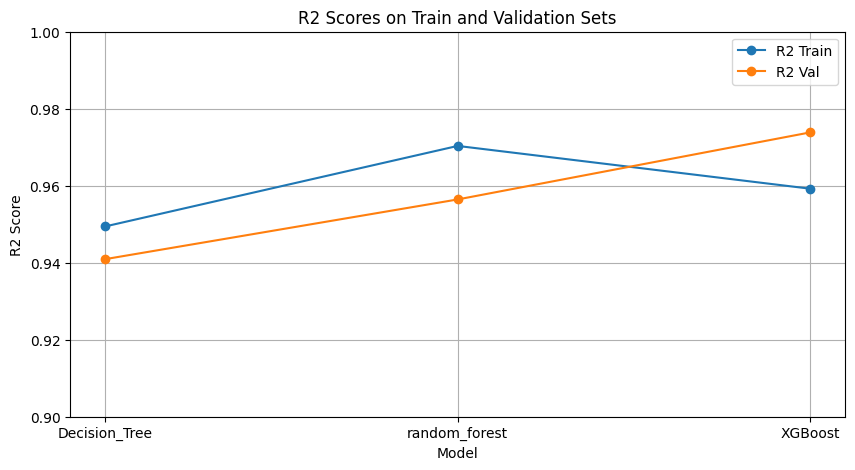

In [ ]:
# Plotting R2 scores on train and val
plt.figure(figsize=(10, 5))
plt.plot(performance_df.index, performance_df['R2_train'], marker='o', label='R2 Train')
plt.plot(performance_df.index, performance_df['R2_val'], marker='o', label='R2 Val')
plt.title('R2 Scores on Train and Validation Sets')
plt.ylim(0.90,1)
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.legend()
plt.grid(True)
plt.show()

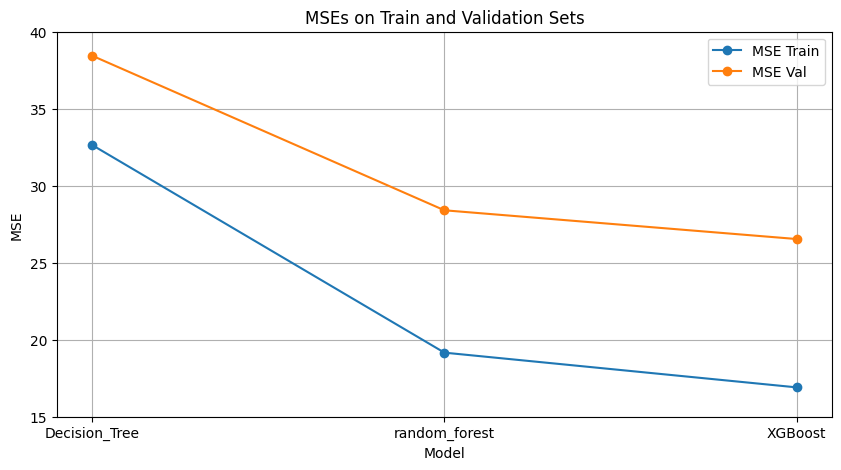

In [ ]:
# Plotting MSEs
plt.figure(figsize=(10, 5))
plt.plot(performance_df.index, performance_df['MSE_train'], marker='o', label='MSE Train')
plt.plot(performance_df.index, performance_df['MSE_val'], marker='o', label='MSE Val')
plt.title('MSEs on Train and Validation Sets')
plt.ylim(15,40)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()